## You're here! 
Welcome to your first competition in the [ITI's AI Pro training program](https://ai.iti.gov.eg/epita/ai-engineer/)! We hope you enjoy and learn as much as we did prepairing this competition.


## Introduction

In the competition, it's required to predict the whether an inpatient is`Readmitted` within 30 days given info about the encounter.

This is the getting started notebook. Things are kept simple so that it's easier to understand the steps and modify it.

Feel free to `Fork` this notebook and share it with your modifications **OR** use it to create your submissions.

### Prerequisites
You should know how to use python and a little bit of Machine Learning. You can apply the techniques you learned in the training program and submit the new solutions! 

### Checklist
You can participate in this competition the way you perefer. However, I recommend following these steps if this is your first time joining a competition on Kaggle.

* Fork this notebook and run the cells in order.
* Submit this solution.
* Make changes to the data processing step as you see fit.
* Submit the new solutions.

*You can submit up to 5 submissions per day. You can select only one of the submission you make to be considered in the final ranking.*


Don't hesitate to leave a comment or contact me if you have any question!

## Import the libraries

We'll use `pandas` to load and manipulate the data. Other libraries will be imported in the relevant sections.

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import missingno as msno
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

In [6]:
plt.style.use('fivethirtyeight')

In [7]:
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis

In [8]:
dataset_path = '/content/'

train = pd.read_csv(os.path.join(dataset_path, 'train.csv'))

print("The shape of the dataset is {}.\n\n".format(train.shape))

train.head()

The shape of the dataset is (71236, 50).




,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,197920182,110382426,Caucasian,Female,[80-90),?,3,1,7,5,...,No,No,No,No,No,No,No,Ch,Yes,>30
1,30870324,1276911,Caucasian,Male,[70-80),?,3,5,1,3,...,No,No,No,No,No,No,No,No,Yes,NO
2,126616944,92115693,Caucasian,Female,[70-80),?,3,3,1,8,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3,303646118,32010471,Caucasian,Male,[50-60),?,6,1,7,7,...,No,No,No,No,No,No,No,No,No,>30
4,109444026,2402271,Caucasian,Male,[40-50),?,1,1,6,2,...,No,Steady,No,No,No,No,No,No,Yes,NO


In [9]:
train['readmitted'].value_counts()

NO     38405
>30    24881
<30     7950
Name: readmitted, dtype: int64

In [10]:
train['readmitted'].replace({'NO' : 0, '>30' : 1, '<30' : 2}, inplace = True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71236 non-null  int64 
 1   patient_nbr               71236 non-null  int64 
 2   race                      71236 non-null  object
 3   gender                    71236 non-null  object
 4   age                       71236 non-null  object
 5   weight                    71236 non-null  object
 6   admission_type_id         71236 non-null  int64 
 7   discharge_disposition_id  71236 non-null  int64 
 8   admission_source_id       71236 non-null  int64 
 9   time_in_hospital          71236 non-null  int64 
 10  payer_code                71236 non-null  object
 11  medical_specialty         71236 non-null  object
 12  num_lab_procedures        71236 non-null  int64 
 13  num_procedures            71236 non-null  int64 
 14  num_medications       

## Baseline model

In [ ]:
df_copy = train.copy()

In [ ]:
df_copy.replace('?', 'missing', inplace= True)

In [ ]:
df_copy.shape

(71236, 50)

In [ ]:
X = df_copy.drop(['readmitted', 'encounter_id'], axis = 1)
X = pd.get_dummies(X)
y = df_copy['readmitted']
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify= y, test_size = 0.2 ,random_state= 42)

In [ ]:
clf = DecisionTreeClassifier(max_depth= 5, random_state= 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score = f1_score(y_val, y_pred, average= 'micro')
print(f'The base line model is DecisionTreeClassifier with score {score}')

The base line model is DecisionTreeClassifier with score 0.5808534531162268


## Data Preprocessing

We've got 71236 examples in the dataset with 48 featues, 1 ID (`encounter_id`), and the labels (`readmitted`).

By looking at the features and a sample from the data, the features are numerical and catogerical types. What about some descriptive statistics?

In [12]:
train.shape

(71236, 50)

In [13]:
df_test = pd.read_csv('/content/test.csv')

In [14]:
df_test.shape

(30530, 49)

In [15]:
df = pd.concat([train , df_test])

In [16]:
df.replace('?', 'Missing', inplace= True)

In [13]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,197920182,110382426,Caucasian,Female,[80-90),Missing,3,1,7,5,...,No,No,No,No,No,No,No,Ch,Yes,1.0
1,30870324,1276911,Caucasian,Male,[70-80),Missing,3,5,1,3,...,No,No,No,No,No,No,No,No,Yes,0.0
2,126616944,92115693,Caucasian,Female,[70-80),Missing,3,3,1,8,...,No,Up,No,No,No,No,No,Ch,Yes,0.0
3,303646118,32010471,Caucasian,Male,[50-60),Missing,6,1,7,7,...,No,No,No,No,No,No,No,No,No,1.0
4,109444026,2402271,Caucasian,Male,[40-50),Missing,1,1,6,2,...,No,Steady,No,No,No,No,No,No,Yes,0.0


In [17]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,71236.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,0.572477
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,0.684073
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,2.000000


### Categorical

In [18]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Missing             2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

<AxesSubplot:xlabel='race', ylabel='count'>

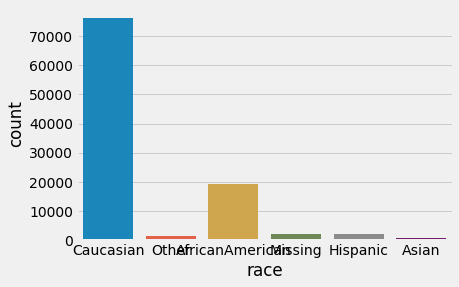

In [19]:
sns.countplot(df['race'])

<AxesSubplot:xlabel='gender', ylabel='count'>

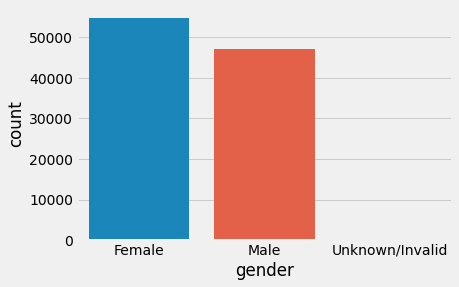

In [20]:
sns.countplot(df['gender'])

<AxesSubplot:xlabel='age'>

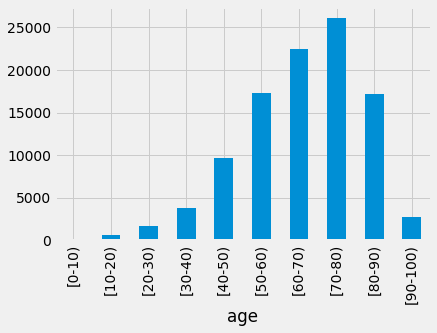

In [21]:
df.groupby('age').size().plot(kind='bar')

In [22]:
df['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [23]:
df['age'] = df['age'].map({'[0-10)': 5,
                                    '[10-20)':15,
                                    '[20-30)':25,
                                    '[30-40)': 35,
                                    '[40-50)':45,
                                    '[50-60)': 55,
                                    '[60-70)': 65,
                                    '[70-80)': 75,                         
                                    '[80-90)': 85, 
                                    '[90-100)':95})

In [24]:
df['admission_type_id'].value_counts()

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

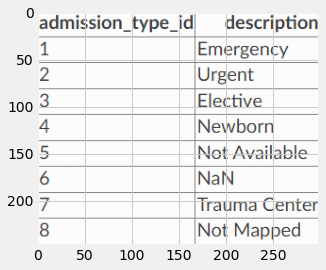

In [25]:
img = plt.imread('/content/admission type id.PNG')
plt.imshow(img)

In [26]:
df['admission_type_id'] = df['admission_type_id'].map({ 1 : 'Emergency',
                                                                  2 : 'Emergency',
                                                                  3 : 'Elective',
                                                                  4 : 'Newborn',
                                                                  5 : np.nan,
                                                                  6 : np.nan,
                                                                  7 : 'Emergency',
                                                                  8 : np.nan})

<AxesSubplot:xlabel='admission_type_id', ylabel='count'>

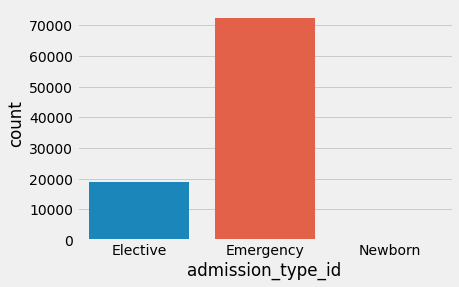

In [27]:
sns.countplot(df['admission_type_id'])

There are a few of newborn category

In [28]:
df[df['admission_type_id'] == 'Newborn'][['age','admission_type_id']]

,age,admission_type_id
23053,85,Newborn
30588,55,Newborn
44068,65,Newborn
52806,5,Newborn
57503,75,Newborn
4303,45,Newborn
4813,75,Newborn
6807,85,Newborn
7247,65,Newborn
25264,65,Newborn


In [29]:
df['admission_type_id'].replace('Newborn', np.nan, inplace = True)
# df.loc[df_copy.admission_type_id == 'Newborn', 'age'] = 5

In [30]:
sorted(df['discharge_disposition_id'].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 22,
 23,
 24,
 25,
 27,
 28]

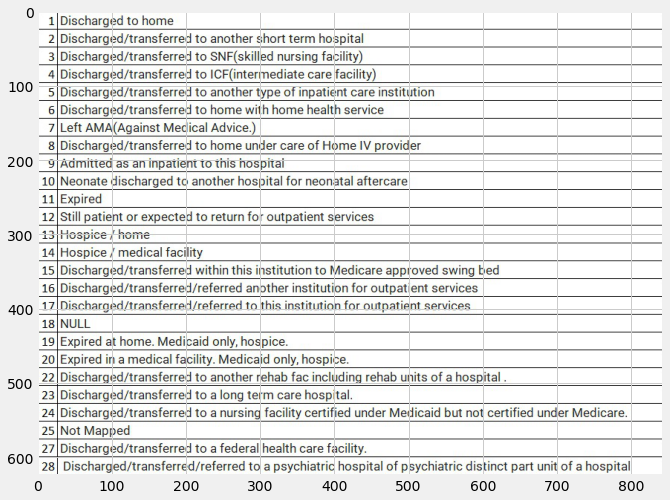

In [31]:
img = plt.imread('/content/discharge_disposition_id.jpg')
plt.figure(figsize= (10,10))
plt.imshow(img)

In [32]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].map({ 1 : 'Discharged to home',
                                                                                2 : 'transferred another facility',
                                                                                3 : 'transferred another facility',
                                                                                4 : 'transferred another facility',
                                                                                5 : 'transferred another facility',
                                                                                6 : 'Discharged to home',
                                                                                7 : 'left AMA',
                                                                                8 : 'Discharged to home',
                                                                                9 : 'Discharged to home',
                                                                                10 : 'Neonate discharged',
                                                                                11 : 'Expired',
                                                                                12 : 'Still patient',
                                                                                13 : 'Expired',
                                                                                14 : 'Expired',
                                                                                15 : 'Still patient',
                                                                                16 : 'transferred another facility',
                                                                                17 : 'Still patient',
                                                                                18 : np.nan,
                                                                                19 : 'Expired',
                                                                                20 : 'Expired',
                                                                                22 : 'transferred another facility',
                                                                                23 : 'transferred another facility',
                                                                                24 : 'transferred another facility',
                                                                                25 : np.nan,
                                                                                27 : 'transferred another facility',
                                                                                28 : 'transferred another facility',
})

<AxesSubplot:xlabel='count', ylabel='discharge_disposition_id'>

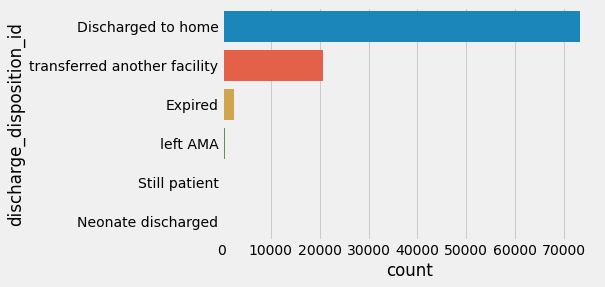

In [33]:
sns.countplot(data = df ,y = 'discharge_disposition_id')

Neonate discharged your baby is released from hospital care and you can take him home.

In [34]:
df[df['discharge_disposition_id'] == 'Neonate discharged'][['age','discharge_disposition_id']]

,age,discharge_disposition_id
19397,75,Neonate discharged
20719,95,Neonate discharged
28163,55,Neonate discharged
28634,75,Neonate discharged
37591,65,Neonate discharged
47852,85,Neonate discharged


In [35]:
df['discharge_disposition_id'].replace('Neonate discharged', np.nan, inplace = True)

In [36]:
sorted(df['admission_source_id'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 17, 20, 22, 25]

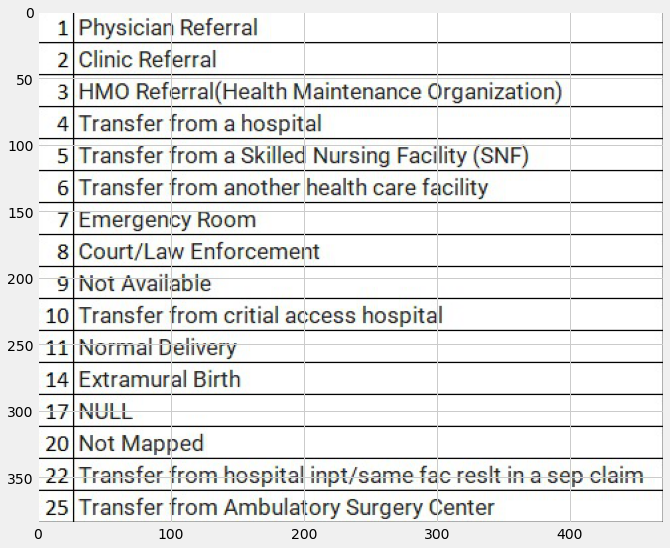

In [37]:
img = plt.imread('/content/admission_source_id.jpg')
plt.figure(figsize= (10,10))
plt.imshow(img)

Extramural Birth : born outside the hospital

normal delivery : the natural process by which a baby is born from the mother without significant medical intervention.


In [38]:
df['admission_source_id'] = df['admission_source_id'].map({1 : 'Referral',
                                                           2 : 'Referral',
                                                           3 : 'Referral',
                                                           4 : 'Transfered from facility',
                                                           5 : 'Transfered from facility',
                                                           6 : 'Transfered from facility',
                                                           7 : 'Emergency',
                                                           8 : 'Emergency',
                                                           9 : np.nan,
                                                           10 : 'Transfered from facility',
                                                           11 : 'Delivery',
                                                           14 : 'Delivery',
                                                           17 : np.nan,
                                                           20 : np.nan,
                                                           22 : 'Transfered from facility',
                                                           25 : 'Transfered from facility',
})

<AxesSubplot:xlabel='count', ylabel='admission_source_id'>

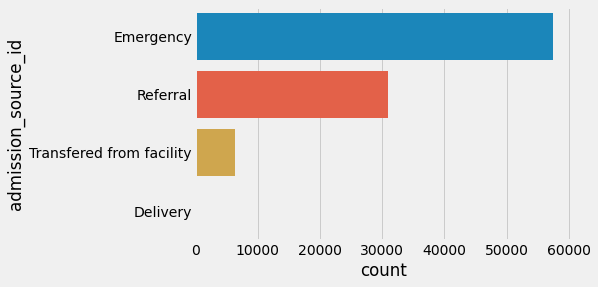

In [39]:
sns.countplot(data = df ,y = 'admission_source_id')

In [40]:
df[df.admission_source_id == 'Delivery'][['admission_source_id', 'age', 'gender']]

,admission_source_id,age,gender
20550,Delivery,25,Female
28203,Delivery,75,Female
56798,Delivery,75,Female
7247,Delivery,65,Male


In [41]:
df['admission_source_id'].replace('Delivery', np.nan, inplace = True)

<AxesSubplot:xlabel='time_in_hospital', ylabel='count'>

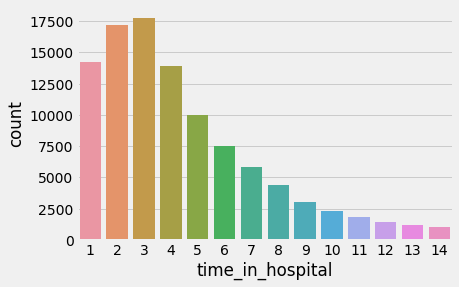

In [42]:
sns.countplot(df['time_in_hospital'])

In [43]:
df['payer_code'].value_counts()

Missing    40256
MC         32439
HM          6274
SP          5007
BC          4655
MD          3532
CP          2533
UN          2448
CM          1937
OG          1033
PO           592
DM           549
CH           146
WC           135
OT            95
MP            79
SI            55
FR             1
Name: payer_code, dtype: int64

In [44]:
df['payer_code'].isnull().sum()

0

In [45]:
df['medical_specialty'].isnull().sum()

0

<AxesSubplot:xlabel='num_procedures', ylabel='count'>

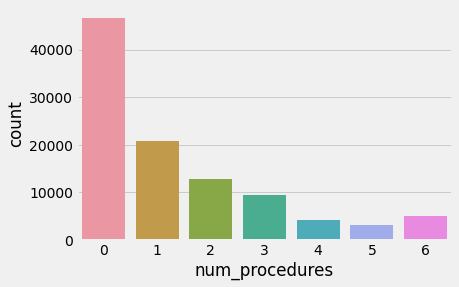

In [46]:
sns.countplot(df['num_procedures'])

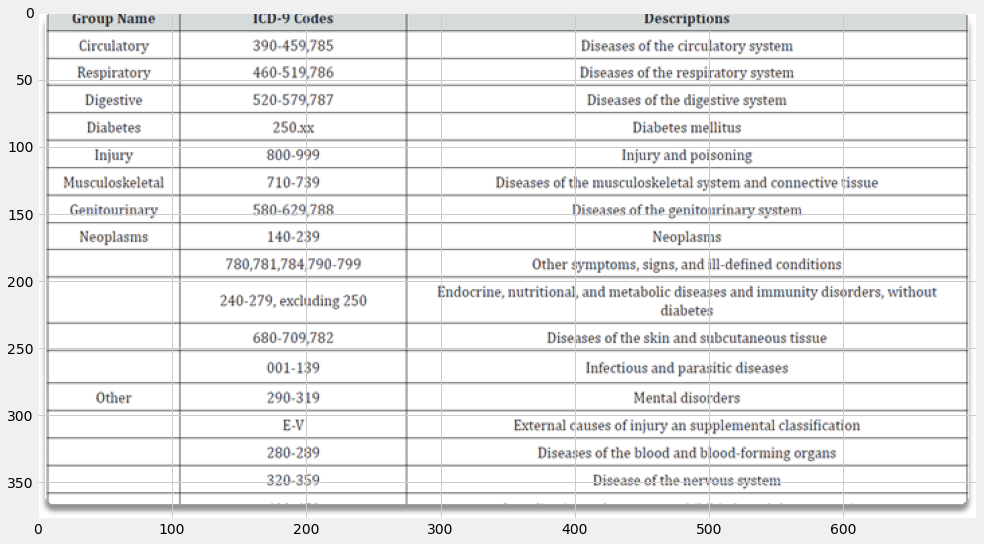

In [47]:
plt.figure(figsize= (15,15))
img = plt.imread('/content/diag.png')
plt.imshow(img)

In [48]:
diag = ['diag_1', 'diag_2', 'diag_3']

In [49]:
# denote 'diag_1' as '1' if it relates to diabetes and '0' if it's not
# remove 'diag_2' and 'diag_3'

df['diag_1'] = pd.Series([1 if val.startswith('250') else 0 for val in df['diag_1']], index=df.index)
df.drop(['diag_2', 'diag_3'], axis=1, inplace=True)

<AxesSubplot:xlabel='max_glu_serum', ylabel='count'>

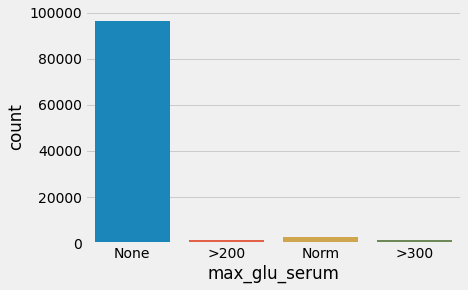

In [50]:
sns.countplot(df['max_glu_serum'])

In [51]:
df['max_glu_serum'].replace({'None' : 0, 'Norm' : 1, '>200' : 2, '>300' : 3}, inplace = True)

<AxesSubplot:xlabel='A1Cresult', ylabel='count'>

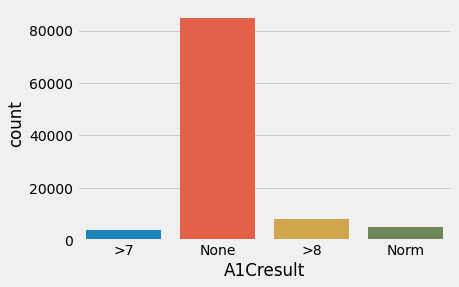

In [52]:
sns.countplot(df['A1Cresult'])

In [53]:
df['A1Cresult'].replace({'None' : 0, 'Norm' : 1, '>7' : 2, '>8' : 3}, inplace = True)

In [54]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [55]:
medications = ['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

In [56]:
for col in medications:
    print('-' * 30, col, '-' * 30)
    print(df[col].value_counts())

------------------------------ metformin ------------------------------
No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64
------------------------------ repaglinide ------------------------------
No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64
------------------------------ nateglinide ------------------------------
No        101063
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64
------------------------------ chlorpropamide ------------------------------
No        101680
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64
------------------------------ glimepiride ------------------------------
No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64
------------------------------ acetohexamide ------------------------------
No        101765
Steady         1
Name: acetohexamide, dtype

In [57]:
df.drop(columns= ['citoglipton', 'examide'], inplace= True)

In [58]:
medications = ['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

In [59]:
df[medications] = df[medications].replace(['No', 'Down', 'Steady', 'Up'], [-2, -1 , 0, 1])

<AxesSubplot:xlabel='change', ylabel='count'>

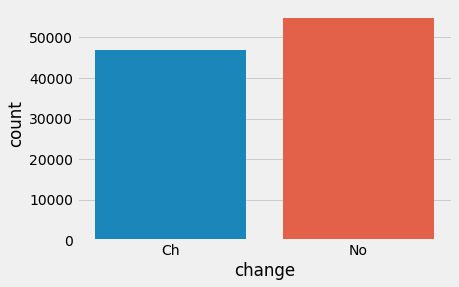

In [60]:
sns.countplot(df['change'])

In [61]:
df['change'].replace({'No' : 0, 'Ch' : 1}, inplace = True)

<AxesSubplot:xlabel='diabetesMed', ylabel='count'>

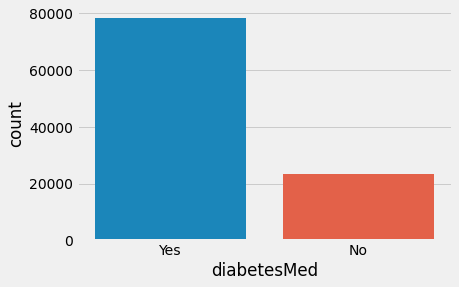

In [62]:
sns.countplot(df['diabetesMed'])

In [63]:
df['diabetesMed'].replace({'No' : 0, 'Yes' : 1}, inplace = True)

In [64]:
df['readmitted'].value_counts()

0.0    38405
1.0    24881
2.0     7950
Name: readmitted, dtype: int64

In [65]:
df.drop(columns = ['weight', 'payer_code'], inplace = True)

### Handling missing values

In [ ]:
df.isnull().sum()

patient_nbr                     0
race                         2273
gender                          3
age                             0
weight                      98569
admission_type_id              10
discharge_disposition_id     4680
admission_source_id          7068
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide   

In [ ]:
null_cols = ['admission_type_id','admission_source_id','gender', 'race',
             'discharge_disposition_id','payer_code','medical_specialty']

<AxesSubplot:>

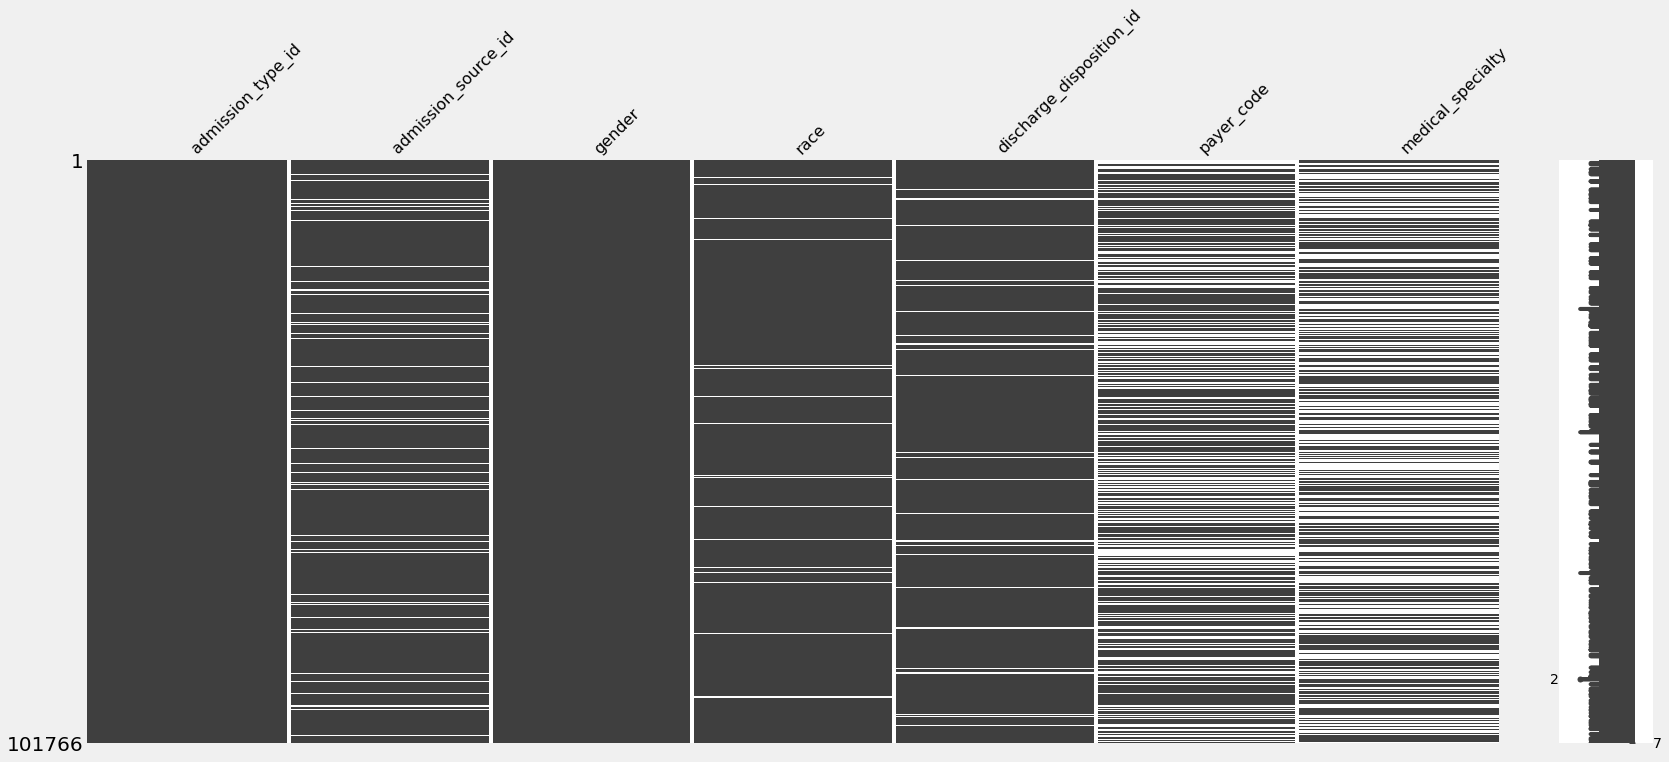

In [ ]:
msno.matrix(df[null_cols])

<AxesSubplot:>

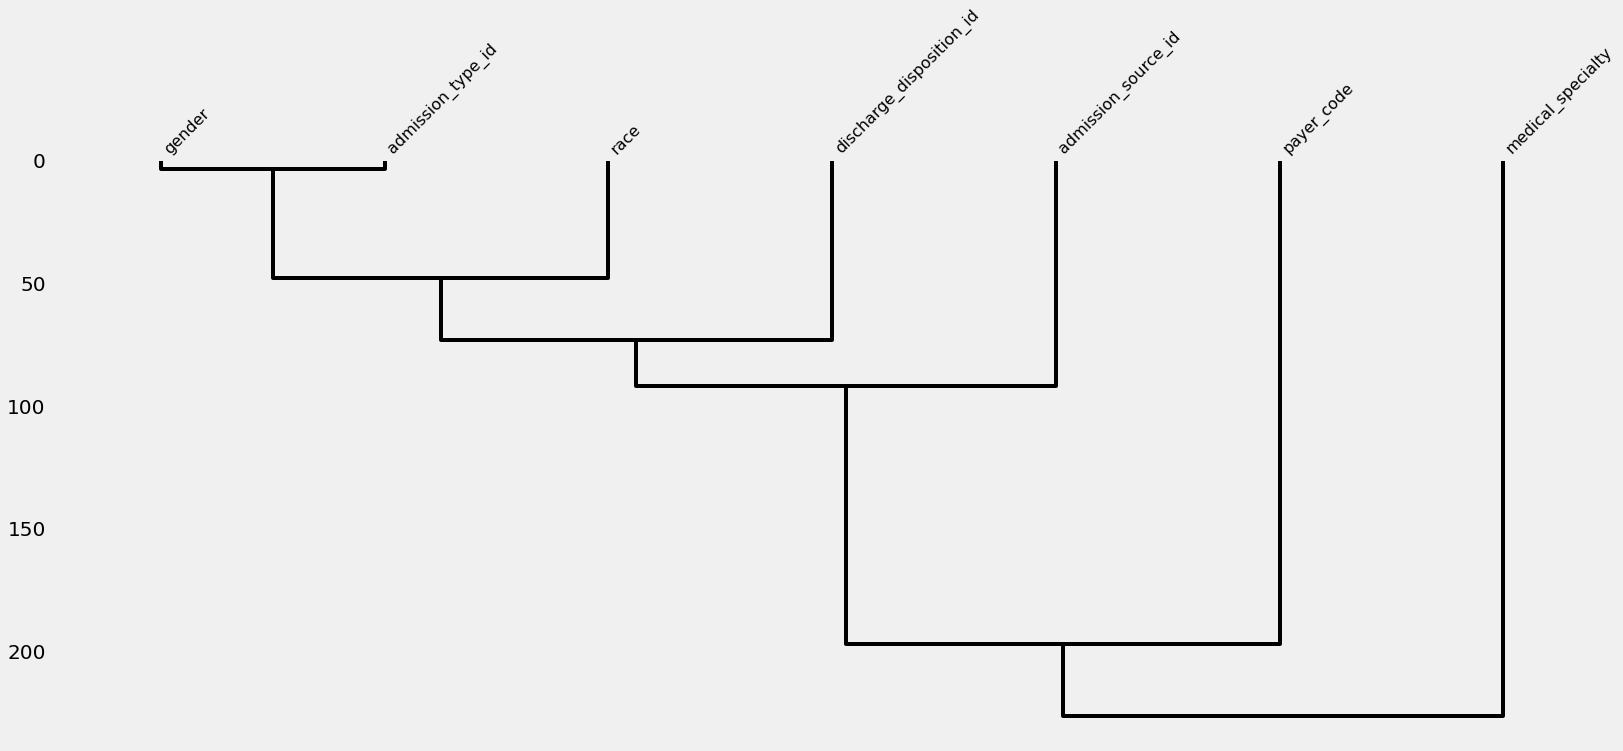

In [ ]:
msno.dendrogram(df[null_cols])

There is a correlation between admission_source_id, admission_type_id so i will try to use this to dealing with some nan

In [ ]:
df.drop(columns = ['weight', 'payer_code', 'medical_specialty'], inplace = True)

In [ ]:
df = df.fillna('Not available')

In [ ]:
df_copy = df.copy()

In [ ]:
null_cols = ['admission_type_id','admission_source_id','gender', 'race','discharge_disposition_id']
not_null = df_copy.columns[~df_copy.columns.isin(null_cols)].values

for col in null_cols:
  encoder = LabelEncoder()
  not_null = np.append(not_null, col)
  data = df_copy[not_null]
  data.drop(columns= ['readmitted', 'encounter_id'], inplace = True)
  X = data.drop(columns = col)
  X = pd.get_dummies(X)
  y = data[col]
  data = pd.concat([X, y], axis = 1)
  
  train_data = data[~data[col].isnull()]
  test_data = data[data[col].isnull()]

  X_train = train_data.drop(columns = col)
  y_train = train_data[col]
  y_train = encoder.fit_transform(y_train)

  X_test = test_data.drop(columns = col)
  y_test = test_data[col]
  
  from lightgbm import LGBMClassifier
  lgbm = LGBMClassifier()
  lgbm.fit(X_train, y_train)
  y_test = lgbm.predict(X_test)

  y_test = encoder.inverse_transform(y_test)
  test_data[col] = y_test
  data = pd.concat([train_data, test_data])

  df_copy[col] = data[col].reset_index(drop = True)
  

In [ ]:
df.reset_index(drop= True, inplace = True)

In [ ]:
for i in range(df.shape[0]):
    if df.loc[i, 'admission_source_id'] == 'Not available' and df.loc[i, 'admission_type_id'] == 'Emergency':
        df.loc[i, 'admission_source_id'] = 'Emergency'
    
    if df.loc[i, 'admission_source_id'] == 'Not available' and df.loc[i, 'admission_type_id'] == 'Elective':
        df.loc[i, 'admission_source_id'] = 'Referral'    

In [ ]:
df.drop(columns = 'admission_type_id', inplace = True)

In [ ]:
df.replace('Not available', np.nan, inplace = True)

In [ ]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()


df['admission_source_id'] = le1.fit_transform(df['admission_source_id'])
df['discharge_disposition_id'] = le2.fit_transform(df['discharge_disposition_id'])
df['race'] = le3.fit_transform(df['race'])
df['gender'] = le4.fit_transform(df['gender'])

In [ ]:
print(df['discharge_disposition_id'].unique())
print(df['admission_source_id'].unique())
print(df['race'].unique())
print(df['gender'].unique())

[0 4 5 1 3 2]
[ 6  0  5 13  3  1  4  2 14  8  7 15  9 10 12 16 11]
[2 4 0 5 3 1]
[0 1 2]


In [ ]:
df['discharge_disposition_id'].replace(5, np.nan, inplace = True)
df['admission_source_id'].replace(4, np.nan, inplace = True)
df['race'].replace(5, np.nan, inplace = True)
df['gender'].replace(2, np.nan, inplace = True)

In [ ]:
imputer = KNNImputer()

In [ ]:
null_cols = ['admission_source_id','gender', 'race',
             'discharge_disposition_id']

In [ ]:
df[null_cols] = imputer.fit_transform(df[null_cols])

In [ ]:
df[null_cols] = round(df[null_cols]).astype(int)

In [ ]:
df['admission_source_id'] = le1.inverse_transform(df['admission_source_id'])
df['discharge_disposition_id'] = le2.inverse_transform(df['discharge_disposition_id'])
df['race'] = le3.inverse_transform(df['race'])
df['gender'] = le4.inverse_transform(df['gender'])

In [ ]:
df_copy = df.copy()

### Feature Engineering

Creating features involves creating new variables which will be most helpful for our model. This can be adding or removing some features.
- admission type_id and admission source id giving the same information
- we can combine the number of visits of of the patient in the year preceding into one column
- we can count the number of readmitted for each patient
- we can combine the number of procedures
- we can divide medications into diabetes drug classes 
- we can get the number of changes
- we can find if the patient taking more than one type of medication (insulin - pills)

#### Total number of lab tests, procedures and medications

In [66]:
df['num_tests_medications'] = df[['num_lab_procedures', 'num_procedures', 'num_medications']].sum(axis = 1)

#### Ratio of outpatient visits to inpatient visits

In [67]:
df['outpatient_to_inpatient'] = df['number_outpatient'] / (df['number_inpatient'] + 1)

#### Average of number of lab tests, and medications per day during the encounter

In [68]:
df['Average_test_medications/day'] = df[['num_lab_procedures', 'num_procedures']].sum(axis = 1) / df['time_in_hospital']

#### combine the number of visits of of the patient in the year preceding into one column

In [69]:
df['Num_of_visits'] = df[['number_outpatient', 'number_emergency', 'number_inpatient']].sum(axis = 1)

#### Average length of stay in hospital

In [70]:
df['Average_length'] = df['time_in_hospital'] / (df['number_inpatient'] + 1)

#### Calculate the patient severity

In [71]:
df['patient_severity'] = df[['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures','num_medications', 'number_diagnoses']].sum(axis = 1)

#### Number of times a patient has been admitted under each medical speciality

In [72]:
InternalMedicine = ['Family/GeneralPractice', 'Cardiology', 'Pulmonology ','Nephrology', 'Dermatology', 'Speech', 'Neurology', 'Neurophysiology',
                    'Endocrinology','Gastroenterology', 'Hematology','Hematology/Oncology','Hospitalist','InfectiousDiseases','Oncology',
                    'AllergyandImmunology', 'Endocrinology-Metabolism', 'Rheumatology', 'Pulmonology', 'Obstetrics']

pediatrics = ['Pediatrics','Pediatrics-CriticalCare','Pediatrics-EmergencyMedicine','Pediatrics-Endocrinology','Pediatrics-Hematology-Oncology',
               'Pediatrics-Neurology','Pediatrics-Pulmonology', 'Anesthesiology-Pediatric', 'Cardiology-Pediatric', 'Surgery-Pediatric',
              'Pediatrics-AllergyandImmunology', 'Pediatrics-InfectiousDiseases']

psychic = ['Psychiatry-Addictive', 'Psychology', 'Psychiatry',  'Psychiatry-Child/Adolescent', 'PhysicalMedicineandRehabilitation', 'Osteopath']



surgery = ['Surgeon', 'Surgery-Cardiovascular', 'Surgery-Neuro', 'Dentistry', 'Anesthesiology','Pathology', 'Obstetrics', 
          'Surgery-Cardiovascular/Thoracic', 'Surgery-Colon&Rectal', 'Surgery-Maxillofacial', 'Gynecology','Ophthalmology','Otolaryngology','Radiology',
             'Surgery-Plastic', 'Surgery-PlasticwithinHeadandNeck',  'Surgery-Thoracic', 'Obsterics&Gynecology-GynecologicOnco',
             'Surgery-Vascular', 'SurgicalSpecialty', 'Podiatry', 'Surgery-General', 'Orthopedics', 'Orthopedics-Reconstructive', 
                 'Emergency/Trauma', 'Urology','ObstetricsandGynecology', 'Radiologist', 'Proctology', 'SportsMedicine','Perinatology', ]

unknown = ['Resident', 'DCPTEAM', 'PhysicianNotFound', 'OutreachServices']

df['medical_specialty'].replace(InternalMedicine, 'InternalMedicine', inplace = True)
df['medical_specialty'].replace(pediatrics, 'pediatrics', inplace = True)
df['medical_specialty'].replace(psychic, 'psychic', inplace = True)
df['medical_specialty'].replace(surgery, 'surgery', inplace = True)
df['medical_specialty'].replace(unknown, 'Resident', inplace = True)


In [73]:
specialty_counts = df.groupby(['patient_nbr', 'medical_specialty']).size().unstack(fill_value = 0)

In [74]:
specialty_counts.drop(columns = 'Missing', inplace= True)

In [75]:
df = df.merge(specialty_counts, on = 'patient_nbr', how = 'left')

In [76]:
df.drop(columns = 'medical_specialty', inplace = True)

#### Number of readmitted

In [77]:
df['num_readmitted'] = df['patient_nbr'].replace(df['patient_nbr'].value_counts())

In [78]:
df.drop(columns = 'patient_nbr', inplace = True)

#### divide medications into diabetes drug classes

In [79]:
pills_med = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
              'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
              'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

In [80]:
Biguanides = ['metformin', 'metformin-rosiglitazone', 
                'metformin-pioglitazone', 'glyburide-metformin', 'glipizide-metformin']
              
Sulfonylureas = ['acetohexamide', 'tolbutamide', 'tolazamide', 'chlorpropamide', 'glipizide', 'glyburide', 'glimepiride', 
                 'glyburide-metformin','glipizide-metformin', 'glimepiride-pioglitazone']

Thiazolidinediones = ['pioglitazone', 'rosiglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 
                      'troglitazone', 'glimepiride-pioglitazone']

Meglitinides = ['repaglinide',  'nateglinide']

Alpha_glucosidase = ['acarbose','miglitol']

In [81]:
df['Biguanides'] = -2
df['Sulfonylureas'] = -2
df['Thiazolidinediones'] = -2
df['Meglitinides'] = -2
df['Alpha_glucosidase'] = -2

In [82]:
df.reset_index(drop = True, inplace = True)

In [83]:
for row in range(df.shape[0]):
  for col in Biguanides:
    if df.loc[row, col] != -2:
      df.loc[row, 'Biguanides'] = df.loc[row, col]
      continue

In [84]:
for row in range(df.shape[0]):
  for col in Sulfonylureas:
    if df.loc[row, col] != -2:
      df.loc[row, 'Sulfonylureas'] = df.loc[row, col]
      continue

In [85]:
for row in range(df.shape[0]):
  for col in Thiazolidinediones:
    if df.loc[row, col] != -2:
      df.loc[row, 'Thiazolidinediones'] = df.loc[row, col]
      continue

In [86]:
for row in range(df.shape[0]):
  for col in Meglitinides:
    if df.loc[row, col] != -2:
      df.loc[row, 'Meglitinides'] = df.loc[row, col]
      continue

In [87]:
for row in range(df.shape[0]):
  for col in Alpha_glucosidase:
    if df.loc[row, col] != -2:
      df.loc[row, 'Alpha_glucosidase'] = df.loc[row, col]
      continue

In [88]:
df.drop(columns = pills_med, inplace = True)

In [89]:
medications = ['Biguanides', 'Sulfonylureas', 'Thiazolidinediones', 'Meglitinides', 'Alpha_glucosidase', 'insulin']

In [90]:
for col in medications:
    print('-' * 30, col, '-' * 30)
    print(df[col].value_counts())

------------------------------ Biguanides ------------------------------
-2    81122
 0    18994
 1     1072
-1      578
Name: Biguanides, dtype: int64
------------------------------ Sulfonylureas ------------------------------
-2    72820
 0    25761
 1     1878
-1     1307
Name: Sulfonylureas, dtype: int64
------------------------------ Thiazolidinediones ------------------------------
-2    88113
 0    13040
 1      409
-1      204
Name: Thiazolidinediones, dtype: int64
------------------------------ Meglitinides ------------------------------
-2    99533
 0     2043
 1      134
-1       56
Name: Meglitinides, dtype: int64
------------------------------ Alpha_glucosidase ------------------------------
-2    101421
 0       325
 1        12
-1         8
Name: Alpha_glucosidase, dtype: int64
------------------------------ insulin ------------------------------
-2    47383
 0    30849
-1    12218
 1    11316
Name: insulin, dtype: int64


#### get the number of changes in medication

In [91]:
for row in range(df.shape[0]):
  changes = 0
  for col in medications:
    if abs(df.loc[row, col]) == 1:
      changes += 1
  df.loc[row, 'change'] = changes

#### find if the patient taking more than one type of medication pills (any - some - all)

In [92]:
df['combo_medication'] = 'any'

for row in range(df.shape[0]):
  num_med = 0
  for col in medications:
    if df.loc[row, col] != -2:
      num_med += 1

  if num_med > 0 and  num_med < 5 :
    df.loc[row, 'combo_medication'] = 'some'

  elif num_med == 5:
    df.loc[row, 'combo_medication'] = 'all'

#### Blood sugar control

In [93]:
df['Blood_sugar_control'] = df['A1Cresult'] + df['max_glu_serum']

#### Numerical

In [94]:
df.select_dtypes(exclude= 'object').columns

Index(['encounter_id', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'insulin', 'change', 'diabetesMed',
       'readmitted', 'num_tests_medications', 'outpatient_to_inpatient',
       'Average_test_medications/day', 'Num_of_visits', 'Average_length',
       'patient_severity', 'InternalMedicine', 'Resident', 'pediatrics',
       'psychic', 'surgery', 'num_readmitted', 'Biguanides', 'Sulfonylureas',
       'Thiazolidinediones', 'Meglitinides', 'Alpha_glucosidase',
       'Blood_sugar_control'],
      dtype='object')

In [95]:
numerical_cols = ['age', 'time_in_hospital', 'num_lab_procedures',
                  'num_procedures', 'num_medications', 'number_outpatient',
                  'number_emergency', 'number_inpatient', 'number_diagnoses',
                  'change','num_tests_medications', 'outpatient_to_inpatient',
                  'Average_test_medications/day', 'Num_of_visits', 'Average_length',
                  'patient_severity', 'num_readmitted', 'Blood_sugar_control']

In [96]:
len(numerical_cols)

18

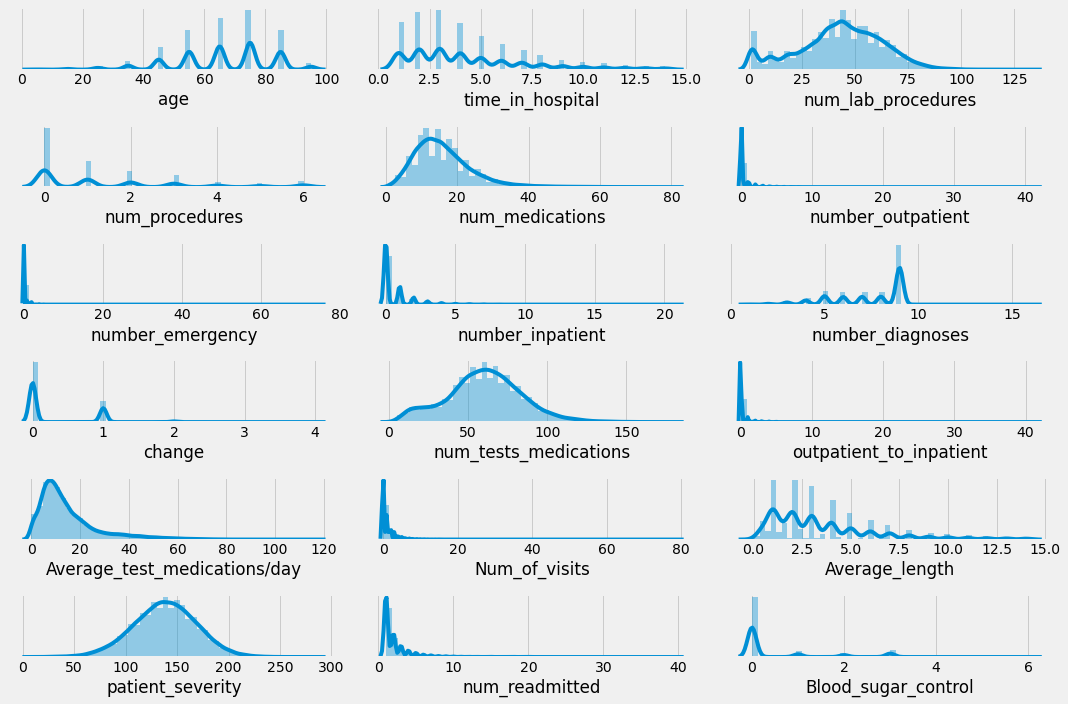

In [97]:
plt.figure(figsize= (15, 10))
for i in range (len(numerical_cols)):
  plt.subplot(6, 3, i + 1)
  plt.yticks([])
  sns.distplot(df[numerical_cols[i]])
plt.tight_layout()

In [98]:
skewed_col = ['time_in_hospital', 'num_lab_procedures','num_procedures', 'num_medications','number_outpatient',
                  'number_emergency', 'number_inpatient', 'num_tests_medications', 'outpatient_to_inpatient',
                  'Average_test_medications/day', 'Num_of_visits', 'Average_length',
              'num_readmitted', 'Blood_sugar_control']

In [99]:
for col in skewed_col:
  df[col] = np.log(1 + df[col])

#### Feature Selection

In [98]:
import scipy.stats as stats

#Statistical Tests (Chi Square and Anova)
p_val = []
sig = []
for i in df.columns:
    if i in numerical_cols:
        stat, p = stats.f_oneway(df[df['readmitted'] == 0][i], df[df['readmitted'] == 1][i], df[df['readmitted'] == 2][i])
    else:
        ct = pd.crosstab(df[i], df['readmitted'])
        stat, p, dof, exp = stats.chi2_contingency(ct)
    p_val.append(p)
    if p < 0.05:
        sig.append('Significant')
    else:
        sig.append("Insignificant")
stats_df = pd.DataFrame({"columns" : df.columns, "p_value" : p_val, "significance" : sig})

stats_df.sort_values(by='p_value',ascending = True)

,columns,p_value,significance
33,num_readmitted,0.000000e+00,Significant
32,surgery,0.000000e+00,Significant
28,InternalMedicine,0.000000e+00,Significant
5,discharge_disposition_id,0.000000e+00,Significant
21,readmitted,0.000000e+00,Significant
13,number_inpatient,0.000000e+00,Significant
25,Num_of_visits,0.000000e+00,Significant
12,number_emergency,7.265520e-272,Significant
15,number_diagnoses,1.605030e-195,Significant
11,number_outpatient,8.737712e-168,Significant


In [100]:
cat_cols = df.select_dtypes(include= 'object').columns.tolist()

In [101]:
encoder = LabelEncoder()

for col in cat_cols:
    if df[col].isnull().sum() > 0:
      df[col] = encoder.fit_transform(df[col])
      df[col].replace(df[col].max(), -1, inplace = True)

    else:
      df[col] = encoder.fit_transform(df[col])

    df[col] = df[col].astype('category')


df_selection = df.iloc[:train.shape[0], :]

X = df_selection.drop(columns = ['readmitted','encounter_id'] )
y = df_selection['readmitted']

from lightgbm import LGBMClassifier

clf = LGBMClassifier(categorical_feature = cat_cols, random_state = 42)

In [102]:
# import joblib
# import sys
# sys.modules['sklearn.externals.joblib'] = joblib
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(estimator = clf,
          n_features_to_select = 'auto',
          direction = 'backward', 
          scoring = 'f1_micro',
          cv = 5)     
          
# Train SFS with our dataset
sfs = sfs.fit(X, y)


### Split Data

In [ ]:
df_copy = df.copy()

In [ ]:
# df = df_copy.copy()

In [ ]:
train = df.iloc[:train.shape[0], :]
X_test = df.iloc[train.shape[0]:, :]

In [ ]:
train = train.sample(frac = 1)

In [ ]:
train.drop(columns= 'encounter_id', inplace= True)

In [ ]:
X = train.drop(columns = 'readmitted')
X = pd.get_dummies(X)
y = train['readmitted']

In [ ]:
X.shape

(71236, 44)

In [ ]:
X_test_dum = pd.get_dummies(X_test)

In [ ]:
X_test_dum.shape

(30530, 46)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size = 0.2 ,stratify= y, random_state= 42)

### Model Selection

In [ ]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 15.4 MB/s eta 0:00:00


In [ ]:
from lightgbm import LGBMClassifier
from catboost import Pool, CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

#### Train on imbalanced data

In [ ]:
y_train.value_counts()

0.0    30724
1.0    19904
2.0     6360
Name: readmitted, dtype: int64

In [ ]:
result_dict_train = {}
result_dict_val = {}

In [ ]:
lgbm = LGBMClassifier()
accuracies = cross_val_score(lgbm, X_train, y_train, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
lgbm.fit(X_train, y_train)
y_train_pred = lgbm.predict(X_train)
y_pred = lgbm.predict(X_val)
result_dict_train["LGBMClassifier Train Score"] = accuracies.mean()
result_dict_val["LGBMClassifier val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
GB = GradientBoostingClassifier()
accuracies = cross_val_score(GB, X_train, y_train, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
GB.fit(X_train,y_train)
y_train_pred = GB.predict(X_train)
y_pred = GB.predict(X_val)
result_dict_train["GradientBoostingClassifier Train Score"] = accuracies.mean()
result_dict_val["GradientBoostingClassifier val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
HG = HistGradientBoostingClassifier(loss= 'categorical_crossentropy')
accuracies = cross_val_score(HG, X_train, y_train, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
HG.fit(X_train,y_train)
y_train_pred = HG.predict(X_train)
y_pred = HG.predict(X_val)
result_dict_train["HistGradientBoostingClassifier Train Score"] = accuracies.mean()
result_dict_val["HistGradientBoostingClassifier val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
RF = RandomForestClassifier(max_depth= 5)
accuracies = cross_val_score(RF, X_train, y_train, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_pred = RF.predict(X_val)
result_dict_train["RandomForestClassifier Train Score"] = accuracies.mean()
result_dict_val["RandomForestClassifier val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
XGB = XGBClassifier(max_depth = 5)
accuracies = cross_val_score(XGB, X_train, y_train, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
XGB.fit(X_train,y_train)
y_train_pred = XGB.predict(X_train)
y_pred = XGB.predict(X_val)
result_dict_train["XGBClassifier Train Score"] = accuracies.mean()
result_dict_val["XGBClassifier val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
train_dataset = Pool(data = X_train,
                     label = y_train,)

eval_dataset = Pool(data = X_val,
                    label= y_val)

# Initialize CatBoostClassifier
CT = CatBoostClassifier(iterations=1000,
                           learning_rate = 0.1,
                           loss_function='MultiClass')
accuracies = cross_val_score(CT, X_train, y_train, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
CT.fit(train_dataset)
y_train_pred = CT.predict(X_train)
y_pred = CT.predict(X_val)
result_dict_train["CatBoostClassifier Train Score"] = accuracies.mean()
result_dict_val["CatBoostClassifier val Score"] = f1_score(y_val, y_pred, average= 'micro')

Streaming output truncated to the last 5000 lines.
0:	learn: 1.0293774	total: 31.8ms	remaining: 31.8s
1:	learn: 0.9768759	total: 65.9ms	remaining: 32.9s
2:	learn: 0.9360287	total: 91.6ms	remaining: 30.4s
3:	learn: 0.9010688	total: 117ms	remaining: 29.1s
4:	learn: 0.8729669	total: 141ms	remaining: 28s
5:	learn: 0.8492094	total: 164ms	remaining: 27.1s
6:	learn: 0.8287378	total: 189ms	remaining: 26.8s
7:	learn: 0.8111498	total: 214ms	remaining: 26.5s
8:	learn: 0.7963538	total: 246ms	remaining: 27.1s
9:	learn: 0.7842144	total: 276ms	remaining: 27.3s
10:	learn: 0.7747189	total: 305ms	remaining: 27.4s
11:	learn: 0.7666012	total: 330ms	remaining: 27.2s
12:	learn: 0.7591355	total: 353ms	remaining: 26.8s
13:	learn: 0.7524023	total: 379ms	remaining: 26.7s
14:	learn: 0.7465531	total: 400ms	remaining: 26.3s
15:	learn: 0.7418921	total: 422ms	remaining: 26s
16:	learn: 0.7371304	total: 452ms	remaining: 26.1s
17:	learn: 0.7331445	total: 477ms	remaining: 26s
18:	learn: 0.7296960	total: 500ms	remaining:

In [ ]:
Ab = AdaBoostClassifier()
accuracies = cross_val_score(Ab, X_train, y_train, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
Ab.fit(X_train,y_train)
y_train_pred = Ab.predict(X_train)
y_pred = Ab.predict(X_val)
result_dict_train["AdaBoostClassifier Train Score"] = accuracies.mean()
result_dict_val["AdaBoostClassifier val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
estimator = []
estimator.append(('lgbm', LGBMClassifier(max_depth= 5)))
estimator.append(('HG', HistGradientBoostingClassifier(max_depth= 5)))
estimator.append(('GB', GradientBoostingClassifier(max_depth= 5)))
estimator.append(('XGB', XGBClassifier(max_depth= 5)))
estimator.append(('CAT', CatBoostClassifier(max_depth= 5)))


VC = VotingClassifier(estimators= estimator, voting= 'soft')
#accuracies = cross_val_score(VC, X_train, y_train, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
VC.fit(X_train,y_train)
y_train_pred = VC.predict(X_train)
y_pred = VC.predict(X_val)
result_dict_train["VotingClassifier Train Score"] = f1_score(y_train, y_train_pred, average= 'micro')
result_dict_val["VotingClassifier val Score"] = f1_score(y_val, y_pred, average= 'micro')

Learning rate set to 0.097245
0:	learn: 1.0327140	total: 33ms	remaining: 33s
1:	learn: 0.9809366	total: 61.9ms	remaining: 30.9s
2:	learn: 0.9379969	total: 89.4ms	remaining: 29.7s
3:	learn: 0.9036230	total: 117ms	remaining: 29.1s
4:	learn: 0.8762546	total: 143ms	remaining: 28.4s
5:	learn: 0.8537795	total: 168ms	remaining: 27.8s
6:	learn: 0.8343714	total: 198ms	remaining: 28.1s
7:	learn: 0.8165201	total: 224ms	remaining: 27.8s
8:	learn: 0.8023210	total: 251ms	remaining: 27.6s
9:	learn: 0.7905129	total: 278ms	remaining: 27.5s
10:	learn: 0.7798420	total: 304ms	remaining: 27.4s
11:	learn: 0.7713589	total: 333ms	remaining: 27.4s
12:	learn: 0.7634583	total: 362ms	remaining: 27.5s
13:	learn: 0.7573971	total: 385ms	remaining: 27.1s
14:	learn: 0.7513735	total: 411ms	remaining: 27s
15:	learn: 0.7456293	total: 439ms	remaining: 27s
16:	learn: 0.7412741	total: 469ms	remaining: 27.1s
17:	learn: 0.7369566	total: 493ms	remaining: 26.9s
18:	learn: 0.7336508	total: 516ms	remaining: 26.6s
19:	learn: 0.730

In [ ]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index", columns=["Score"])
df_result_train.sort_values(by = 'Score', ascending=False)

,Score
LGBMClassifier Train Score,0.722497


In [ ]:
df_result_val = pd.DataFrame.from_dict(result_dict_val,orient = "index",columns=["Score"])
df_result_val.sort_values(by = 'Score', ascending=False)

,Score
LGBMClassifier val Score,0.72361


#### Undersampling to the majority class

In [ ]:
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule

In [ ]:
result_dict_undersamplingtrain = {}
result_dict_undersamplingval = {}

In [ ]:
undersample = TomekLinks()
X_res, y_res = undersample.fit_resample(X_train, y_train)

lgbm = LGBMClassifier()
accuracies = cross_val_score(lgbm, X_res, y_res, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_val)
result_dict_undersamplingtrain["TomekLinks Train Score"] = accuracies.mean()
result_dict_undersamplingval["TomekLinks val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
undersample = EditedNearestNeighbours(n_neighbors=3, sampling_strategy= 'not minority')
X_res, y_res = undersample.fit_resample(X_train, y_train)

lgbm = LGBMClassifier()
accuracies = cross_val_score(lgbm, X_res, y_res, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_val)
result_dict_undersamplingtrain["EditedNearestNeighbours Train Score"] = accuracies.mean()
result_dict_undersamplingval["EditedNearestNeighbours val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
undersample = RandomUnderSampler(sampling_strategy= {0 : 15000, 1 : 15000})
X_res, y_res = undersample.fit_resample(X_train, y_train)

lgbm = LGBMClassifier()
accuracies = cross_val_score(lgbm, X_res, y_res, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_val)
result_dict_undersamplingtrain["RandomUnderSampler Train Score"] = accuracies.mean()
result_dict_undersamplingval["RandomUnderSampler val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200, sampling_strategy= 'not minority')
X_res, y_res = undersample.fit_resample(X_train, y_train)

lgbm = LGBMClassifier()
accuracies = cross_val_score(lgbm, X_res, y_res, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_val)
result_dict_undersamplingtrain["OneSidedSelection Train Score"] = accuracies.mean()
result_dict_undersamplingval["OneSidedSelection val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5, sampling_strategy= 'not minority')
X_res, y_res = undersample.fit_resample(X_train, y_train)

lgbm = LGBMClassifier()
accuracies = cross_val_score(lgbm, X_res, y_res, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_val)
result_dict_undersamplingtrain["NeighbourhoodCleaningRule Train Score"] = accuracies.mean()
result_dict_undersamplingval["NeighbourhoodCleaningRule val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
df_train_undersampling = pd.DataFrame.from_dict(result_dict_undersamplingtrain,orient = "index", columns=["Score"])
df_train_undersampling.sort_values(by = 'Score', ascending=False)

In [ ]:
df_val_undersampling = pd.DataFrame.from_dict(result_dict_undersamplingval,orient = "index",columns=["Score"])
df_val_undersampling.sort_values(by = 'Score', ascending=False)

#### Oversampling to the manority class

In [ ]:
from imblearn.over_sampling import ADASYN, SMOTE

In [ ]:
result_dict_oversamplingtrain = {}
result_dict_oversamplingval = {}

In [ ]:
oversample = ADASYN(sampling_strategy= 'not majority')
X_res, y_res = oversample.fit_resample(X_train, y_train)

lgbm = LGBMClassifier()
accuracies = cross_val_score(lgbm, X_res, y_res, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_val)
result_dict_oversamplingtrain["ADASYN Train Score"] = accuracies.mean()
result_dict_oversamplingval["ADASYN val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
oversample = SMOTE(sampling_strategy= 'not majority')
X_res, y_res = oversample.fit_resample(X_train, y_train)

lgbm = LGBMClassifier()
accuracies = cross_val_score(lgbm, X_res, y_res, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_val)
result_dict_oversamplingtrain["SMOTE Train Score"] = accuracies.mean()
result_dict_oversamplingval["SMOTE val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
df_train_oversampling = pd.DataFrame.from_dict(result_dict_oversamplingtrain,orient = "index", columns=["Score"])
df_train_oversampling.sort_values(by = 'Score', ascending=False)

In [ ]:
df_val_oversampling = pd.DataFrame.from_dict(result_dict_oversamplingval,orient = "index", columns=["Score"])
df_val_oversampling.sort_values(by = 'Score', ascending=False)

#### Combination of SMOTE and Tomek Links Undersampling

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN

In [ ]:
result_combineresample_dict_train = {}
result_combineresample_dict_val = {}

In [ ]:
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy= 'not minority'))
X_res, y_res = resample.fit_resample(X_train, y_train)

lgbm = LGBMClassifier()
accuracies = cross_val_score(lgbm, X_res, y_res, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_val)
result_combineresample_dict_train["SMOTETomek Train Score"] = accuracies.mean()
result_combineresample_dict_val["SMOTETomek val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
resample = SMOTEENN(enn=EditedNearestNeighbours())
X_res, y_res = resample.fit_resample(X_train, y_train)

lgbm = LGBMClassifier()
accuracies = cross_val_score(lgbm, X_res, y_res, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_val)
result_combineresample_dict_train["SMOTEENN Train Score"] = accuracies.mean()
result_combineresample_dict_val["SMOTEENN val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
df_combineresample_train = pd.DataFrame.from_dict(result_combineresample_dict_train, orient = "index", columns=["Score"])
df_combineresample_train.sort_values(by = 'Score', ascending=False)

In [ ]:
df_combineresample_val = pd.DataFrame.from_dict(result_combineresample_dict_val, orient = "index", columns=["Score"])
df_combineresample_val.sort_values(by = 'Score', ascending=False)

### Hyperparameter tuning

#### DecisionTreeClassifier

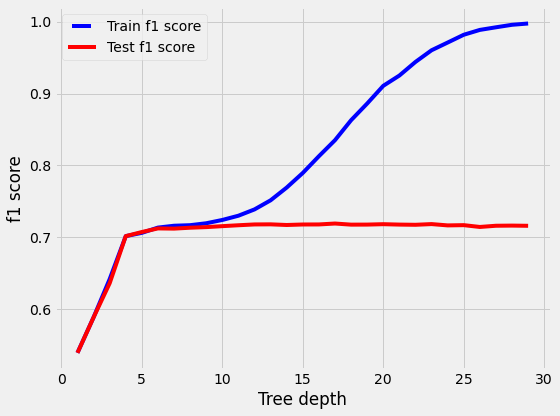

In [ ]:
max_depths = np.arange(1, 30)
train_results = []
test_results = []
for max_depth in max_depths:
   Rf = RandomForestClassifier(max_depth = max_depth)
   Rf.fit(X_train, y_train)
   train_pred = Rf.predict(X_train)
   score = f1_score(y_train, train_pred, average= 'micro')
   train_results.append(score)

   y_pred = Rf.predict(X_val)
   score = f1_score(y_val, y_pred, average= 'micro')
   test_results.append(score)

from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize= (8, 6))
line1, = plt.plot(max_depths, train_results, 'b', label='Train f1 score')
line2, = plt.plot(max_depths, test_results, 'r', label='Test f1 score')
plt.style.use('fivethirtyeight')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('f1 score')
plt.xlabel('Tree depth')
plt.tight_layout()


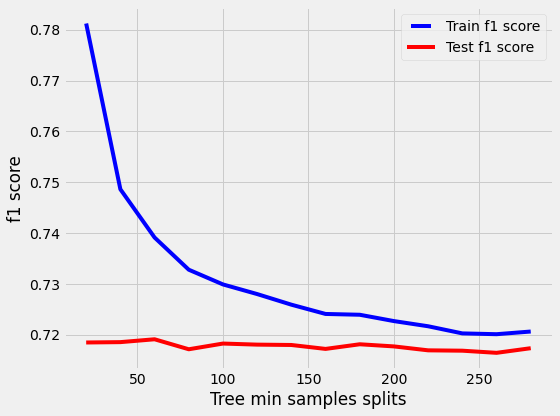

In [ ]:
min_samples_splits = np.arange(20, 300, 20)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   Rf = RandomForestClassifier(min_samples_split=min_samples_split)
   Rf.fit(X_train, y_train)
   train_pred = Rf.predict(X_train)
   score = f1_score(y_train, train_pred, average= 'micro')
   train_results.append(score)

   y_pred = Rf.predict(X_val)
   score = f1_score(y_val, y_pred, average= 'micro')
   test_results.append(score)

from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize= (8, 6))
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train f1 score')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test f1 score')
plt.style.use('fivethirtyeight')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('f1 score')
plt.xlabel('Tree min samples splits')
plt.tight_layout()

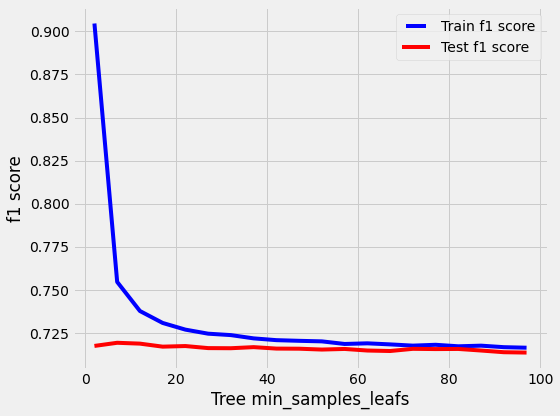

In [ ]:
min_samples_leafs = np.arange(2, 100, 5)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   Rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   Rf.fit(X_train, y_train)
   train_pred = Rf.predict(X_train)
   score = f1_score(y_train, train_pred, average= 'micro')
   train_results.append(score)

   y_pred = Rf.predict(X_val)
   score = f1_score(y_val, y_pred, average= 'micro')
   test_results.append(score)

from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize= (8, 6))
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train f1 score')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test f1 score')
plt.style.use('fivethirtyeight')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('f1 score')
plt.xlabel('Tree min_samples_leafs')
plt.tight_layout()

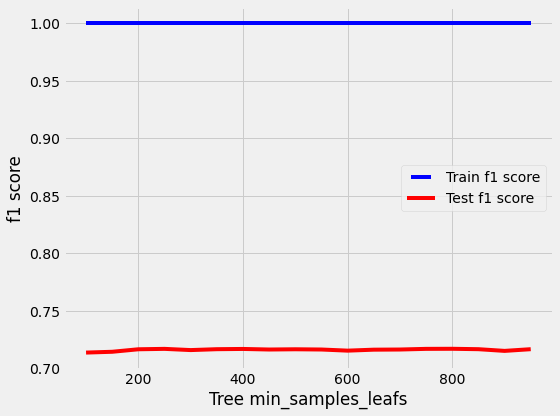

In [ ]:
n_estimators = np.arange(100, 1000, 50)
train_results = []
test_results = []
for n_estimator in n_estimators:
   Rf = RandomForestClassifier(n_estimators = n_estimator)
   Rf.fit(X_train, y_train)
   train_pred = Rf.predict(X_train)
   score = f1_score(y_train, train_pred, average= 'micro')
   train_results.append(score)

   y_pred = Rf.predict(X_val)
   score = f1_score(y_val, y_pred, average= 'micro')
   test_results.append(score)

from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize= (8, 6))
line1, = plt.plot(n_estimators, train_results, 'b', label='Train f1 score')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test f1 score')
plt.style.use('fivethirtyeight')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('f1 score')
plt.xlabel('Tree min_samples_leafs')
plt.tight_layout()

In [ ]:
from sklearn.model_selection  import GridSearchCV
#from sklearn.metrics import make_scorer

clf = RandomForestClassifier()

parameters = {"max_depth" : [5,6,7], "min_samples_leaf" : [70,75,80], 
             "min_samples_split" : [50, 60, 200, 250]}

cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats= 3)
grid = GridSearchCV(estimator = clf, param_grid = parameters,scoring =  'f1_micro', n_jobs= -1, cv= cv, verbose= 1)

grid_fit = grid.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

y_train_pred = best_clf.predict(X_train)
y_val_pred = best_clf.predict(X_val)

print("Optimized Model\n------")
print("Final F-score on the train data: {:.4f}".format(f1_score(y_train, y_train_pred, average= 'micro')))
print("Final F-score on the testing data: {:.4f}".format(f1_score(y_val, y_val_pred, average= 'micro')))

Fitting 15 folds for each of 36 candidates, totalling 540 fits
Optimized Model
------
Final F-score on the train data: 0.7137
Final F-score on the testing data: 0.7131


#### LGBMClassifier

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 12.3 MB/s eta 0:00:00


In [ ]:
import optuna
from optuna.samplers import TPESampler

In [ ]:
def objective(trial):
    """
    Objective function to be minimized.
    """
    param = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "num_class": 3,
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.1),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 500),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    gbm = LGBMClassifier(**param)
    gbm.fit(X_train, y_train)
    preds = gbm.predict(X_val)
    accuracy = f1_score(y_val, preds, average= 'micro')
    return accuracy

In [ ]:
sampler = TPESampler(seed=1)
study = optuna.create_study(study_name="lightgbm", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials= 1000, timeout= 4000, n_jobs= -1)

[I 2023-03-11 21:43:44,333] A new study created in memory with name: lightgbm
[I 2023-03-11 21:44:21,201] Trial 0 finished with value: 0.7080993823694554 and parameters: {'n_estimators': 151, 'max_depth': 30, 'learning_rate': 0.09764808420054073, 'reg_alpha': 0.00994570908740759, 'reg_lambda': 0.153624975387828, 'colsample_bytree': 0.5, 'min_data_per_groups': 16, 'lambda_l1': 1.0361159176623058e-07, 'lambda_l2': 7.450091638549969e-05, 'num_leaves': 271, 'feature_fraction': 0.8802781814542808, 'bagging_fraction': 0.9180546670591434, 'bagging_freq': 2, 'min_child_samples': 53}. Best is trial 0 with value: 0.7080993823694554.
[I 2023-03-11 21:44:34,099] Trial 1 finished with value: 0.7050814149354295 and parameters: {'n_estimators': 173, 'max_depth': 25, 'learning_rate': 0.08047463365576277, 'reg_alpha': 0.002836729585288248, 'reg_lambda': 0.001449826306577957, 'colsample_bytree': 0.4, 'min_data_per_groups': 9, 'lambda_l1': 0.00019350877259056247, 'lambda_l2': 3.1733771716475287e-07, 'num

KeyboardInterrupt: ignored

In [ ]:
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)
print('Best trial:', study.best_trial)

Best parameters: {'n_estimators': 266, 'max_depth': 17, 'learning_rate': 0.028255682304596352, 'reg_alpha': 0.9455019871519581, 'reg_lambda': 4.382556478319661, 'colsample_bytree': 0.6, 'min_data_per_groups': 95, 'lambda_l1': 1.1184804988244725e-05, 'lambda_l2': 0.003242121368485587, 'num_leaves': 37, 'feature_fraction': 0.8908252679495773, 'bagging_fraction': 0.7936537632665603, 'bagging_freq': 3, 'min_child_samples': 22}
Best value: 0.7252245929253228
Best trial: FrozenTrial(number=233, state=TrialState.COMPLETE, values=[0.7252245929253228], datetime_start=datetime.datetime(2023, 3, 11, 17, 51, 26, 678622), datetime_complete=datetime.datetime(2023, 3, 11, 17, 51, 47, 292716), params={'n_estimators': 266, 'max_depth': 17, 'learning_rate': 0.028255682304596352, 'reg_alpha': 0.9455019871519581, 'reg_lambda': 4.382556478319661, 'colsample_bytree': 0.6, 'min_data_per_groups': 95, 'lambda_l1': 1.1184804988244725e-05, 'lambda_l2': 0.003242121368485587, 'num_leaves': 37, 'feature_fraction': 

In [ ]:
model = lgb.LGBMClassifier(**study.best_params)
model.fit(X, y)

NameError: ignored

In [ ]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

print("Optimized Model\n------")
print("Final F-score on the train data: {:.4f}".format(f1_score(y_train, y_train_pred, average= 'micro')))
print("Final F-score on the testing data: {:.4f}".format(f1_score(y_val, y_val_pred, average= 'micro')))

Optimized Model
------
Final F-score on the train data: 0.6632
Final F-score on the testing data: 0.6591


## Model Training



In [ ]:
params = {'n_estimators': 266, 'max_depth': 17, 'learning_rate': 0.028255682304596352, 'reg_alpha': 0.9455019871519581, 'reg_lambda': 4.382556478319661, 'colsample_bytree': 0.6, 'min_data_per_groups': 95, 'lambda_l1': 1.1184804988244725e-05, 'lambda_l2': 0.003242121368485587, 'num_leaves': 37, 'feature_fraction': 0.8908252679495773, 'bagging_fraction': 0.7936537632665603, 'bagging_freq': 3, 'min_child_samples': 22}

lgbm = LGBMClassifier(**params)
lgbm.fit(X, y)
y_test = lgbm.predict(X_test_dum.drop(columns=['readmitted', 'encounter_id']))

In [ ]:
y_test

array([1., 0., 0., ..., 0., 0., 0.])

In [ ]:
X_test_dum['readmitted'] = y_test

In [ ]:
X_test_dum['readmitted'].replace({0 : 'NO', 1 : '>30', 2 : '<30'}, inplace = True)

In [ ]:
X_test_dum['readmitted'].value_counts()

NO     19194
>30    11195
<30      141
Name: readmitted, dtype: int64

# Submission File Generation

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file. 

First, we'll load the data.

Now we're ready to generate the submission file. The submission file needs the columns `encounter_id` and `readmitted` only.

In [ ]:
X_test_dum['encounter_id'] = X_test_dum['encounter_id'].astype('int')

In [ ]:
X_test_dum[['encounter_id', 'readmitted']].to_csv('/content/submission.csv', index=False)

The remaining steps is to submit the generated file and are as follows. 

1. Press `Save Version` on the upper right corner of this notebook.
2. Write a `Version Name` of your choice and choose `Save & Run All (Commit)` then click `Save`.
3. Wait for the saved notebook to finish running the go to the saved notebook.
4. Under the title of your notebook you'll find multiple tabs (notebook, data, logs, comments). Select `Data` tab. 
4. Select the `submission.csv` file and click `Submit`.

Now your submission will be evaluated and your score will be updated on the leaderboard! CONGRATULATIONS!!

## Conclusion

In this notebook, we have demonstrated the essential steps that one should do in order to get "slightly" familiar with the data and the submission process. We chose not to go into details in each step to keep the welcoming notebook simple and make a room for improvement.

You're encourged to `Fork` the notebook, edit it, add your insights and use it to create your submission.